In [1]:
!kaggle datasets download -d rounakbanik/the-movies-dataset 

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0




  0%|          | 0.00/228M [00:00<?, ?B/s]
  0%|          | 1.00M/228M [00:01<04:20, 914kB/s]
  1%|          | 2.00M/228M [00:01<02:37, 1.50MB/s]
  1%|▏         | 3.00M/228M [00:01<02:07, 1.86MB/s]
  2%|▏         | 4.00M/228M [00:02<01:53, 2.06MB/s]
  2%|▏         | 5.00M/228M [00:02<01:44, 2.24MB/s]
  3%|▎         | 6.00M/228M [00:03<01:43, 2.24MB/s]
  3%|▎         | 7.00M/228M [00:03<01:43, 2.23MB/s]
  4%|▎         | 8.00M/228M [00:04<01:42, 2.24MB/s]
  4%|▍         | 9.00M/228M [00:04<01:44, 2.20MB/s]
  4%|▍         | 10.0M/228M [00:05<01:42, 2.24MB/s]
  5%|▍         | 11.0M/228M [00:05<01:39, 2.29MB/s]
  5%|▌         | 12.0M/228M [00:06<01:58, 1.91MB/s]
  6%|▌         | 13.0M/228M [00:06<01:59, 1.89MB/s]
  6%|▌         | 14.0M/228M [00:07<01:59, 1.88MB/s]
  7%|▋         | 15.0M/228M [00:07<01:56, 1.91MB/s]
  7%|▋         | 16.0M/228M [00:08<01:59, 1.85MB/s]
  7%|▋         | 17.0M/228M [00:09<02:10, 1.69MB/s]
  8%|▊         | 18.0M/228M [00:09<02:11, 1.67MB/s]
  8%|▊         | 19.0

In [2]:
import zipfile
import os

# Caminho do arquivo .zip
zip_file_path = 'the-movies-dataset.zip'

# Diretório onde os arquivos serão extraídos
extract_to = 'data'

# Certifique-se de que o diretório de extração exista, senão crie-o
os.makedirs(extract_to, exist_ok=True)

# Abre o arquivo .zip e extrai todos os arquivos
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Remove o arquivo .zip após a extração
os.remove(zip_file_path)

In [4]:
import pandas as pd
df = pd.read_csv('data/ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


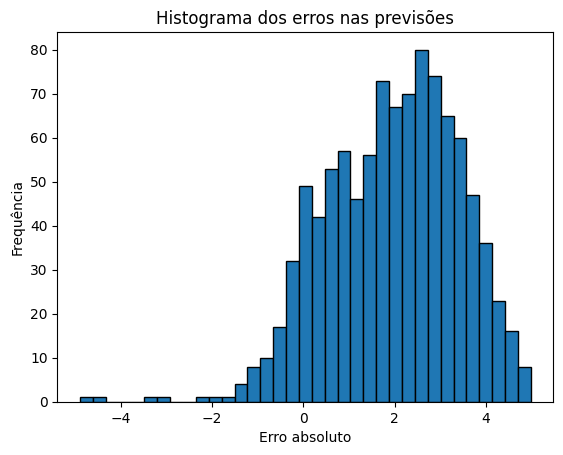

In [3]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

def svd(U, S_diag, Vt, i, j):
    B_aproximada = U @ S_diag @ Vt
    return B_aproximada[i, j]

def main():
    # Carregar e preparar a matriz de dados
    df = pd.read_csv('data/ratings_small.csv')
    matriz_dados = pd.pivot_table(df, values='rating', index='userId', columns='movieId', fill_value=0).to_numpy()
    posicoes_validas = np.argwhere(matriz_dados != 0)

    # Decomposição SVD com 20 autovalores
    U, S, Vt = svds(matriz_dados, k=50)
    S_diag = np.diag(S)

    erros = []
    num_iteracoes = 1000

    for _ in range(num_iteracoes):
        i, j = posicoes_validas[np.random.choice(posicoes_validas.shape[0])]

        valor_original = matriz_dados[i, j]
        matriz_dados[i, j] = np.random.randint(0, 6)  # Introduzir ruído

        predicao = svd(U, S_diag, Vt, i, j)

        erros.append(abs(valor_original - predicao))

    plt.hist(erros, bins=35, edgecolor='black')
    plt.xlabel('Erro absoluto')
    plt.ylabel('Frequência')
    plt.title('Histograma dos erros nas previsões')
    plt.show()

if __name__ == '__main__':
    main()